In [1]:
## We import the apropriate libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
##Data extraction and insertion
!unzip /content/drive/My\ Drive/Colab\ Notebooks/Deep\ Learning\ Project/compressed_dataset.csv.zip

Archive:  /content/drive/My Drive/Colab Notebooks/Deep Learning Project/compressed_dataset.csv.zip
  inflating: compressed_dataset.csv  
  inflating: __MACOSX/._compressed_dataset.csv  


In [4]:

df = pd.read_csv('compressed_dataset.csv')

In [5]:
df.head()

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,19,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,40,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,55,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,78,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0


In [6]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [7]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0


In [8]:
##Attempt 1
from datetime import datetime
events = df.groupby('event_id')

QoE = []



for i in events.groups.keys():

  event = df[df['event_id'] == i]
  if len(event) == 1: 
    QoE.append(event['qoe'].values[0])

  else : 

    T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)

    
    #minutes = event['timestamp'] - event['timestamp'].min()
    
    
    
    minutes = (event.loc[:,"timestamp"] - event.loc[:,"timestamp"].min())*1.67*10**(-5)
    event['minute'] = minutes + 1 #vazw +1 wste to proto lepto na einai to 1 kai oxi to 0. 
                                        #Den exei ousiastikh diafora sto apotelesma
    event = event.astype({'minute':'int'})


    QoE.append((sum(event.groupby('minute')['qoe'].mean()))/T)



print(QoE)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.9898307155269392, 0.9939397838883275, 0.9708654051047224, 0.9890344001755703, 0.9929258962163682, 0.995231774160073, 0.9575874860637894, 0.9977206687009723, 0.9932033536820202, 0.9918860211469844, 0.973790499976554, 0.9771912902654577, 0.9556675471279371, 0.9971498520279553, 0.9836842610209564, 0.9970969734140418, 0.9694631537864055, 0.9922274397542594, 0.9404014232352434, 0.985619451634887, 0.9969651750077508, 0.9949763506789103, 0.9818262581068921, 0.9923130907362009, 0.9932335564760421, 0.9884358542272319, 0.9713876466267124, 0.9735655755352158, 0.9942113578097429, 0.8974084696749807, 0.9885627120687713, 0.9888696488474072, 0.9933993714169018, 0.98474415109101, 0.9900438872040852, 0.9932886143969673, 0.9800445959639477, 0.9902959137278301, 0.9913163032415706, 0.9744096325692828, 0.9880442339000638, 0.985490184177821, 0.9583797848828998, 0.9991090419242595, 0.9636060255092472, 0.9838468507823845, 0.9918049802264357, 0.9121696483627284, 0.9887149663373531, 0.9875826110509451, 0.983

In [9]:
df['QoE'] = 0


for i in range(len(QoE)):
  df.loc[df['event_id'] == i,'QoE'] = QoE[i]

In [10]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,QoE
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,0.995236
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,0.995236
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,0.995236
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,0.995236
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,0.995236


In [11]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

df['viewer_type'] = LabelEncoder().fit_transform(df['viewer_type'])

In [12]:
#check dataframe for null and datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20615370 entries, 0 to 20615369
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   timestamp    datetime64[ns]
 1   customer_id  float64       
 2   event_id     float64       
 3   viewer_id    float64       
 4   city_id      float64       
 5   country_id   float64       
 6   viewer_type  int64         
 7   qoe          float64       
 8   engagement   float64       
 9   buffer_ms    int64         
 10  QoE          float64       
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 1.7 GB


In [13]:
#check the details of numerical data
df.describe()

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,QoE
count,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07
mean,7.808620e+00,1.053845e+02,2.816832e+04,4.112114e+02,5.073638e+00,7.056796e-01,9.841420e-01,4.395985e-01,1.018180e+02,9.822440e-01
std,7.097981e+00,1.282433e+02,2.618064e+04,1.016404e+03,7.884355e+00,4.557367e-01,9.820005e-02,4.461667e-01,8.002422e+03,2.328330e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,9.000000e+00,6.475000e+03,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,9.771913e-01
50%,6.000000e+00,5.300000e+01,1.975200e+04,3.100000e+01,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e-01,0.000000e+00,9.898307e-01
75%,1.300000e+01,1.560000e+02,4.373500e+04,2.410000e+02,6.000000e+00,1.000000e+00,1.000000e+00,9.000000e-01,0.000000e+00,9.939398e-01
max,3.200000e+01,7.330000e+02,1.089730e+05,8.242000e+03,1.230000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.037696e+07,9.999999e-01


In [14]:
df['timestamp'] = df['timestamp'].dt.to_period('M') 

In [15]:
# setting timestamp name as index column
df.set_index("timestamp", inplace = True)
 
# display
df.head()

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,QoE
timestamp,,,,,,,,,,
2021-09,5.0,107.0,11661.0,2.0,3.0,1,0.999976,0.0,785,0.995236
2021-09,5.0,107.0,12810.0,2.0,3.0,0,0.281964,0.9,3895,0.995236
2021-09,5.0,107.0,15129.0,19.0,3.0,0,1.000000,0.9,0,0.995236
2021-09,5.0,107.0,5860.0,217.0,3.0,0,0.999988,0.0,466,0.995236
2021-09,5.0,107.0,4483.0,2.0,3.0,1,1.000000,0.0,0,0.995236


In [30]:
#check the columns of updated data
df.columns


Index(['customer_id', 'event_id', 'viewer_id', 'city_id', 'country_id',
       'viewer_type', 'qoe', 'engagement', 'buffer_ms', 'QoE'],
      dtype='object')

In [31]:
#check the datatypes of data
df.dtypes

customer_id    float64
event_id       float64
viewer_id      float64
city_id        float64
country_id     float64
viewer_type      int64
qoe            float64
engagement     float64
buffer_ms        int64
QoE            float64
dtype: object

## Data Cleaning 

In [32]:
df.corr()

,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,QoE
customer_id,1.000000,0.396116,0.181726,0.182576,0.280668,-0.183205,0.000502,0.011260,0.002461,-0.043383
event_id,0.396116,1.000000,0.175456,0.140753,0.198886,-0.167785,-0.005911,-0.014718,0.001953,-0.081384
viewer_id,0.181726,0.175456,1.000000,0.105359,0.183503,-0.038834,-0.055236,-0.034059,0.011303,-0.131319
city_id,0.182576,0.140753,0.105359,1.000000,0.150240,-0.249043,-0.011115,0.000837,0.001879,-0.029705
country_id,0.280668,0.198886,0.183503,0.150240,1.000000,-0.149777,-0.062678,0.045406,0.003015,-0.152027
viewer_type,-0.183205,-0.167785,-0.038834,-0.249043,-0.149777,1.000000,-0.010102,-0.030059,-0.000058,0.017843
qoe,0.000502,-0.005911,-0.055236,-0.011115,-0.062678,-0.010102,1.000000,-0.001385,-0.041635,0.190700
engagement,0.011260,-0.014718,-0.034059,0.000837,0.045406,-0.030059,-0.001385,1.000000,-0.000567,0.002075
buffer_ms,0.002461,0.001953,0.011303,0.001879,0.003015,-0.000058,-0.041635,-0.000567,1.000000,-0.009591
QoE,-0.043383,-0.081384,-0.131319,-0.029705,-0.152027,0.017843,0.190700,0.002075,-0.009591,1.000000


In [33]:
##Handle Missing Values

#We print null counts by column

df.isnull().sum()


customer_id    0
event_id       0
viewer_id      0
city_id        0
country_id     0
viewer_type    0
qoe            0
engagement     0
buffer_ms      0
QoE            0
dtype: int64

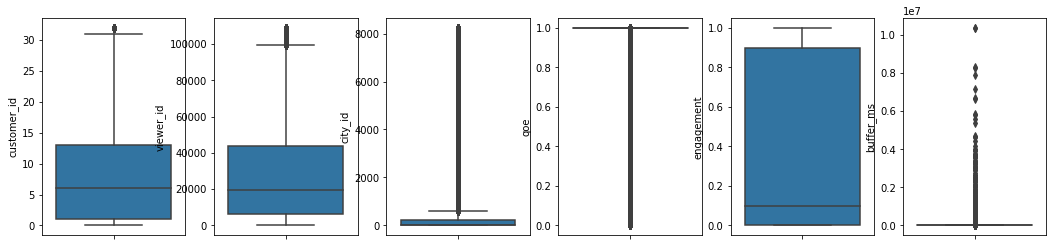

In [ ]:
# We draw box plots for some  variables () with continuous values = OUTLIERS???
cols = ['customer_id', 'viewer_id', 'city_id', 'qoe', 'engagement', 'buffer_ms']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,6,i)
    sns.boxplot(y=col, data=df1)
    i+=1


In [11]:
##Customers' Representative Subset


Text(0, 0.5, 'QoE for each customer ')

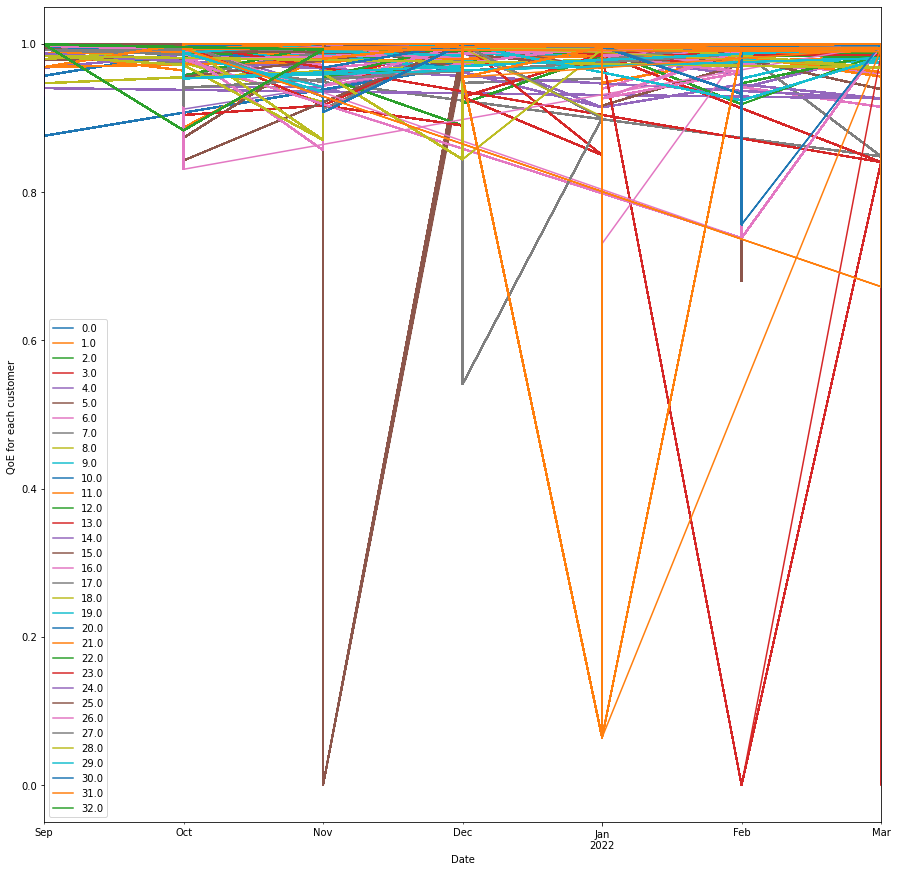

In [16]:


fig, ax = plt.subplots(figsize=(15,15))
df.groupby('customer_id')['QoE'].plot(ax = ax, legend=True)
ax.set_xlabel('Date')
ax.set_ylabel('QoE for each customer ')
##SUBSET???????

In [ ]:
##QoE Discretizing
from sklearn.preprocessing import KBinsDiscretizer
df['qoe_level'] = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform').fit_transform(df[['QoE']])




Text(0.5, 1.0, 'Bad QoE Buffering Severity')

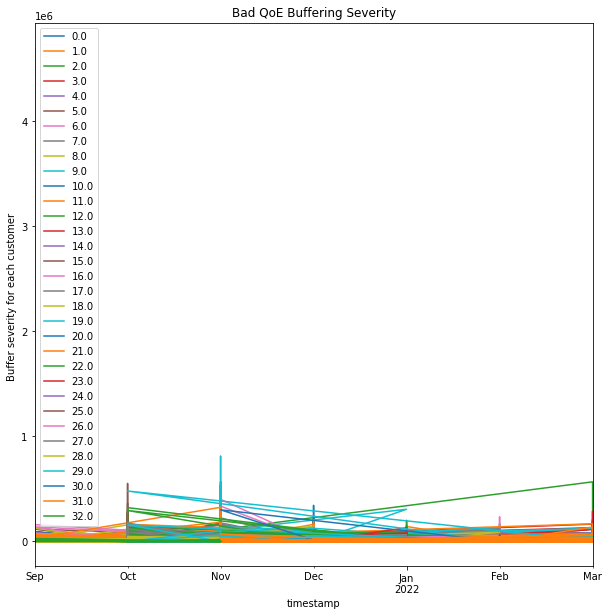

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
df1[df1['qoe_level'] == 0 ].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer ')
ax.set_title('Bad QoE Buffering Severity')

Text(0.5, 1.0, 'Poor QoE Buffering Severity')

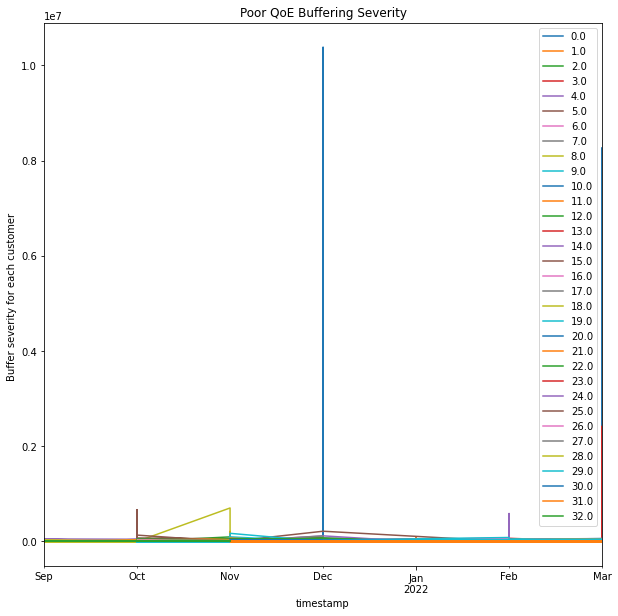

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
df1[df1['qoe_level'] == 1 ].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer ')
ax.set_title('Poor QoE Buffering Severity')

Text(0.5, 1.0, 'Average QoE Buffering Severity')

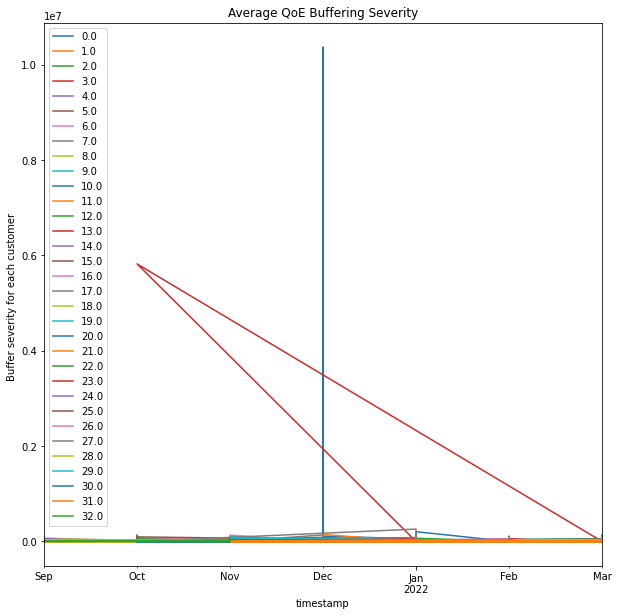

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
df1[df1['qoe_level'] == 2 ].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer ')
ax.set_title('Average QoE Buffering Severity')

Text(0.5, 1.0, 'Good QoE Buffering Severity')

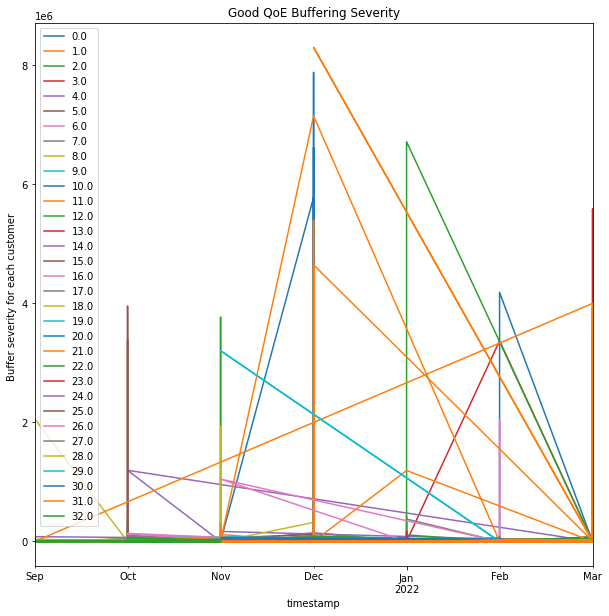

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
df1[df1['qoe_level'] == 3 ].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer ')
ax.set_title('Good QoE Buffering Severity')

Text(0.5, 1.0, 'Excellent QoE Buffering Severity')

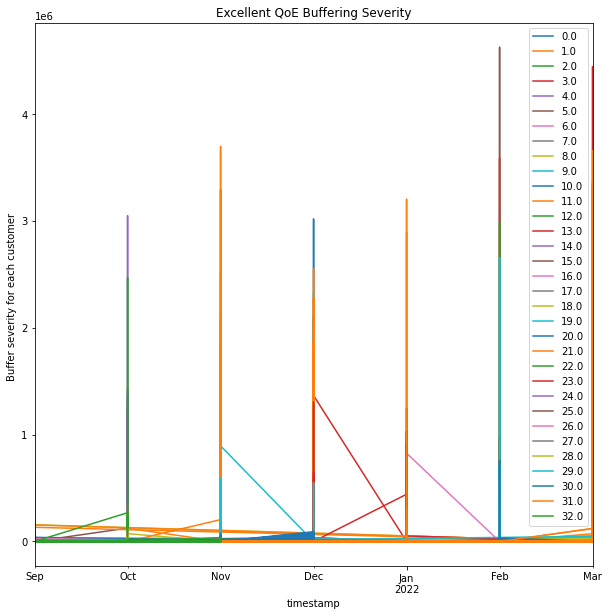

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
df1[df1['qoe_level'] == 4 ].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer ')
ax.set_title('Excellent QoE Buffering Severity')

## Num of viewers over time that experience the same qoe level

In [ ]:
df1['viewer_id'].count()

20615370

Text(0, 0.5, 'Number of viewers for each qoe level')

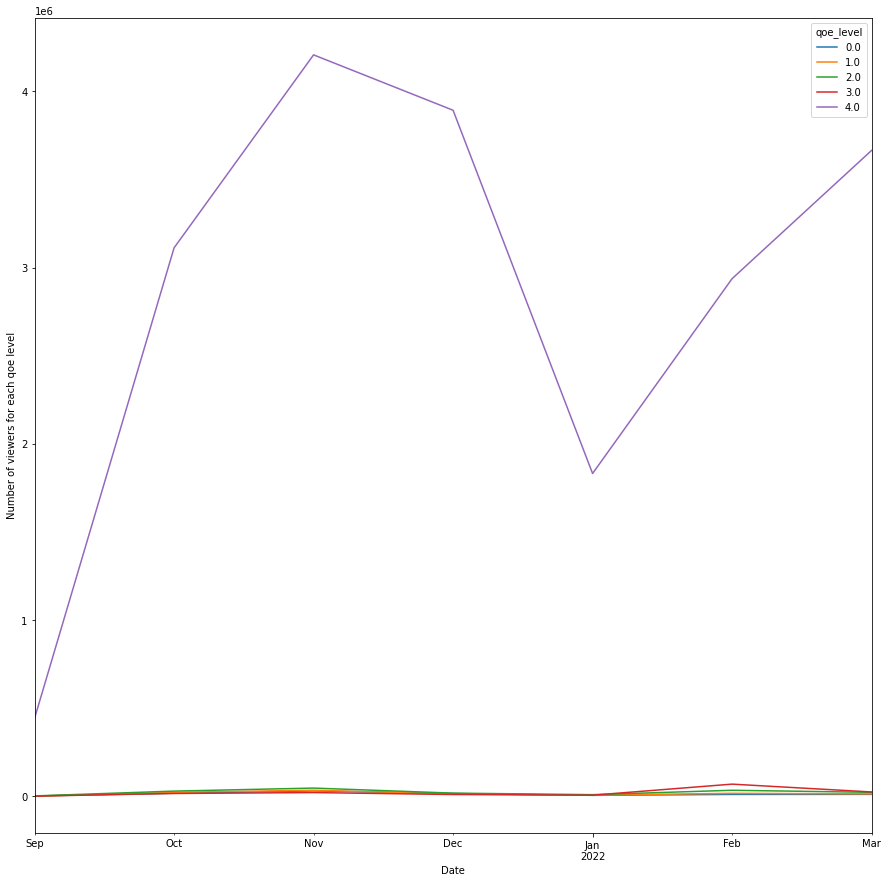

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
#num_of_viewers = df1['viewer_id'].count()
df.groupby(['timestamp','qoe_level']).count()['viewer_id'].unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of viewers for each qoe level')

# QoE over time for each customer and the viewers' location type

In [ ]:
ig, ax = plt.subplots(figsize=(15,15))
df1[df1['viewer_type'] == 0].groupby('customer_id')['qoe'].plot(ax = ax, legend=True)

ax.set_xlabel('Date')
ax.set_ylabel('QoE for each customer')

In [ ]:
df1[df1['viewer_type'] == 1].groupby('customer_id')['qoe'].plot(ax = ax, legend=True)